In [5]:
import matplotlib.pyplot as plt
import torch

import seaborn as sns
import numpy as np

In [6]:
results = torch.load('./results')

In [7]:
correct = (results['targets'] == results['pred'])
attacked = results['attacked']
certified = results['certified']
idx_test = results['idx_test']

perturbed_accuracy = (correct & (~attacked))[:, idx_test].mean(axis=1)
certified_accuracy = (correct & certified)[:, idx_test].mean(axis=1)

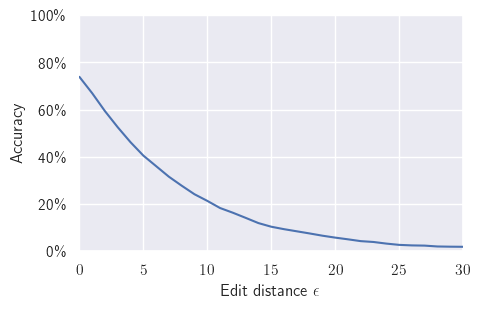

In [9]:
for format in ['pdf', 'pgf']:
    plt.clf()
    plt.cla()

    sns.set_theme()
    pal = sns.color_palette('colorblind', n_colors=2)
    plt.plot(np.arange(50), perturbed_accuracy, clip_on=True, zorder=3, label='Attacked')
    #plt.plot(np.arange(50), certified_accuracy, clip_on=True, zorder=3, label='Certified')
    plt.xlim(0, 30)
    plt.ylim(0, 1)

    plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])

    plt.ylabel('Accuracy')
    plt.xlabel('Edit distance $\epsilon$')

    #plt.legend()